In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from zipfile import ZipFile
!unrar x "/content/PROYECTOIA-U3.rar"
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/PROYECTOIA-U3",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/PROYECTOIA-U3",
    image_size = (img_height, img_width),
    batch_size = batch_size
)


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/PROYECTOIA-U3.rar


Would you like to replace the existing file PROYECTOIA-U3/Ariel Chabla/L00376418_1.jpg
 51900 bytes, modified on 2022-08-04 01:47
with a new one
 51900 bytes, modified on 2022-08-04 01:47

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit A

Extracting  PROYECTOIA-U3/Ariel Chabla/L00376418_1.jpg                     0%  OK 
Extracting  PROYECTOIA-U3/Ariel Chabla/L00376418_2.jpg                     0%  OK 
Extracting  PROYECTOIA-U3/Ariel Chabla/L00376418_3.jpg                     1%  OK 
Extracting  PROYECTOIA-U3/ArroboMercy/L00385770_1.png                      1%  OK 
Extracting  PROYECTOIA-U3/ArroboMercy/L00385770_2.png                      1%  OK 
Extracting  PROYECTOIA-U3/ArroboMercy/L00385770_3.png                      1%  OK 
Extracting  PROYECTOIA-U3/BarraganSteven/L00392978_1.png                   2%  OK 
Extr

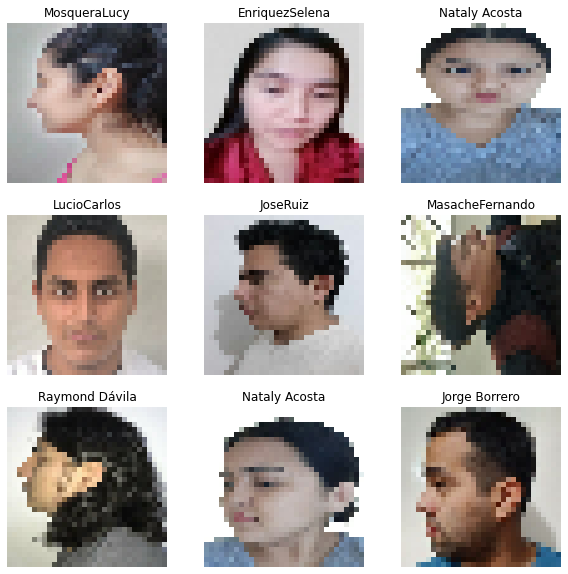

In [ ]:
class_names = ["Ariel Chabla", "ArroboMercy", "BarraganSteven","CevallosJoan","EnriquezSelena","GenesisHeredia","GoyesAnthony","HectorCedeño","Jhon Zambrano","Jordan Espinosa","Jorge Borrero","JoseRuiz","LeonardoBorja","LucioCarlos","MasacheFernando","MelanyLópez","MosqueraLucy","Nataly Acosta","OlallaLuis","PárragaMaríaJosé","PauteKevin","Raymond Dávila","RivasSelena","SalazarJohana","Solano Wilmer","SolórzanoBryan"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(26)
    ]
)

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
model.fit(train_ds,validation_data = val_ds,epochs = 30)

Epoch 1/30
4/4 [==============================] - 1s 191ms/step - loss: 0.0233 - accuracy: 1.0000 - val_loss: 0.0207 - val_accuracy: 1.0000
Epoch 2/30
4/4 [==============================] - 1s 189ms/step - loss: 0.0204 - accuracy: 1.0000 - val_loss: 0.0192 - val_accuracy: 1.0000
Epoch 3/30
4/4 [==============================] - 1s 184ms/step - loss: 0.0198 - accuracy: 1.0000 - val_loss: 0.0183 - val_accuracy: 1.0000
Epoch 4/30
4/4 [==============================] - 1s 186ms/step - loss: 0.0182 - accuracy: 1.0000 - val_loss: 0.0169 - val_accuracy: 1.0000
Epoch 5/30
4/4 [==============================] - 1s 183ms/step - loss: 0.0173 - accuracy: 1.0000 - val_loss: 0.0162 - val_accuracy: 1.0000
Epoch 6/30
4/4 [==============================] - 1s 187ms/step - loss: 0.0161 - accuracy: 1.0000 - val_loss: 0.0151 - val_accuracy: 1.0000
Epoch 7/30
4/4 [==============================] - 1s 189ms/step - loss: 0.0153 - accuracy: 1.0000 - val_loss: 0.0147 - val_accuracy: 1.0000
Epoch 8/30
4/4 [====

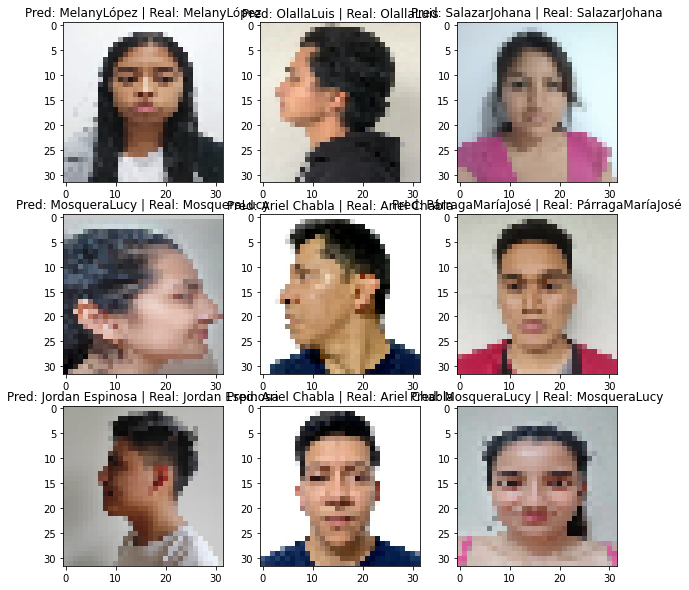

In [ ]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in val_ds.take(1):
  classifications = model(images)
  # print(classifications)
  
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)